  # Heart Disease 

Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the United States. Heart diseases is a term covering any disorder of the heart. One person dies every 37 seconds in the United States from cardiovascular disease. About 647,000 Americans die from heart disease each year—that's 1 in every 4 deaths. Heart disease costs the United States about $219 billion each year from 2014 to 2015. This includes the cost of health care services, medicines, and lost productivity due to death. This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). High blood pressure, high blood cholesterol, and smoking are key risk factors for heart disease. About half of Americans (47%) have at least one of these three risk factors. It is difficult to manually determine the odds of getting heart disease based on risk factors. However, machine learning techniques are useful to predict the output from existing data.

Thus preventing Heart diseases has become more than necessary. Good data-driven systems for predicting heart diseases can improve the entire research and prevention process, making sure that more people can live healthy lives. This is where Machine Learning comes into play. Machine Learning helps in predicting the Heart diseases, and the predictions made are quite accurate.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.metrics import f1_score,accuracy_score,recall_score,classification_report,make_scorer,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

import time

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# loading data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# EDA

### Missing data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Dataset description:

- Age : displays the age of the individual.
- Sex : displays the gender of the individual using the following format : 1 = male 0 = female.
- Chest-pain type : displays the type of chest-pain experienced by the individual using the following format : 1 = typical angina 2 = atypical angina 3 = non - anginal pain 4 = asymptotic
- Resting Blood Pressure : displays the resting blood pressure value of an individual in mmHg (unit)
- Serum Cholestrol : displays the serum cholestrol in mg/dl (unit)
- Fasting Blood Sugar : compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false)
- Resting ECG : 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy
- Max heart rate achieved : displays the max heart rate achieved by an individual.
- Exercise induced angina : 1 = yes 0 = no
- ST depression induced by exercise relative to rest : displays the value which is integer or float.
- Peak exercise ST segment : 1 = upsloping 2 = flat 3 = downsloping
- Number of major vessels (0-3) colored by flourosopy : displays the value as integer or float.
- Thal : displays the thalassemia : 3 = normal 6 = fixed defect 7 = reversable defect
- Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not : 0 = absence 1,2,3,4 = present.

Fortunetly, there are no missing data.

### Outliers

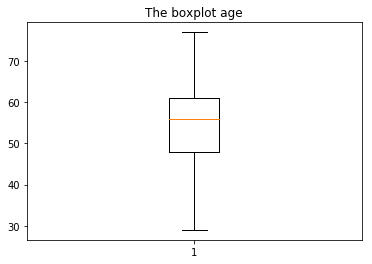

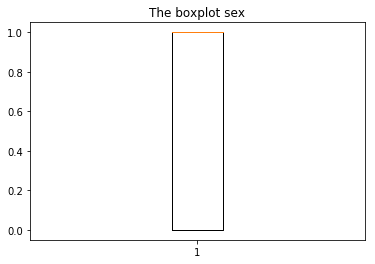

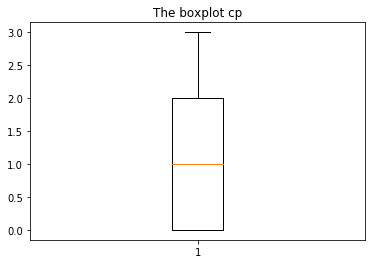

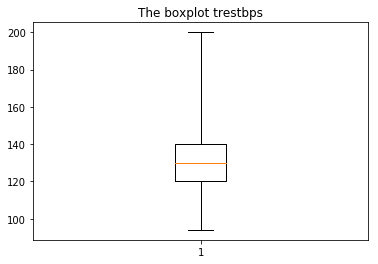

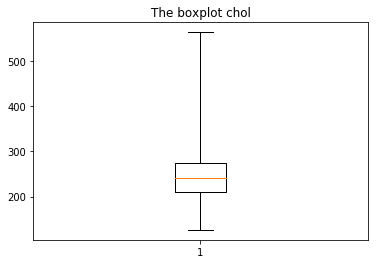

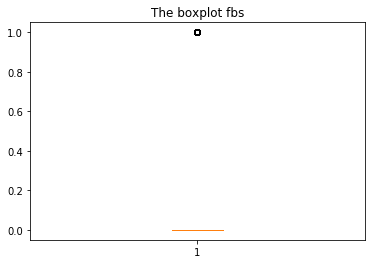

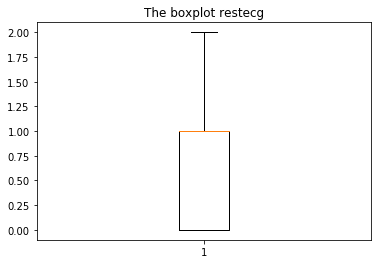

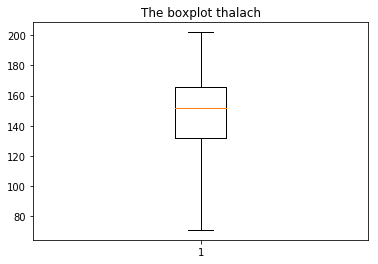

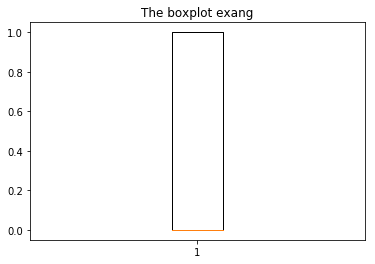

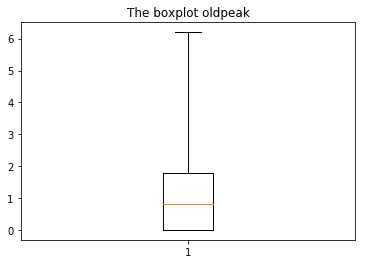

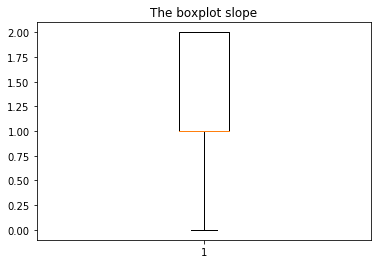

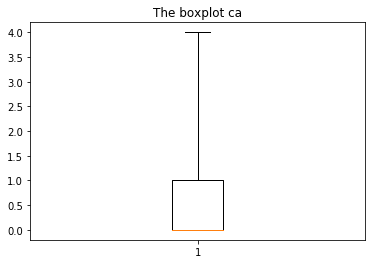

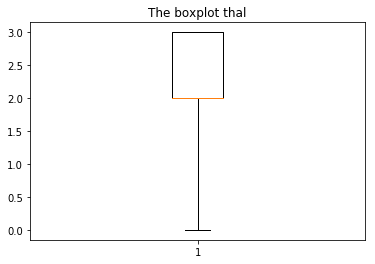

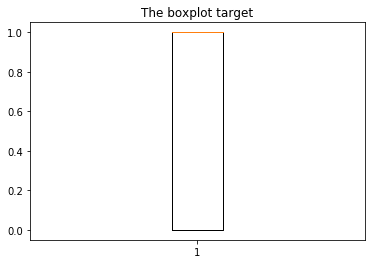

In [5]:
for i in df.columns:
    plt.boxplot(df[i], whis=20)
    plt.title('The boxplot {}'.format(str(i)))
    plt.show()

As we can see above, none of the features have outliers except the fbs and that's because this feature is bunary and has two variabls as shown follow:

Text(0.5, 1.0, 'The histogram of fbs')

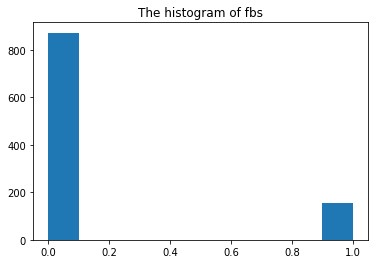

In [6]:
plt.hist(df.fbs)
plt.title('The histogram of fbs')

## Data Exploration

### Univariate visualization

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


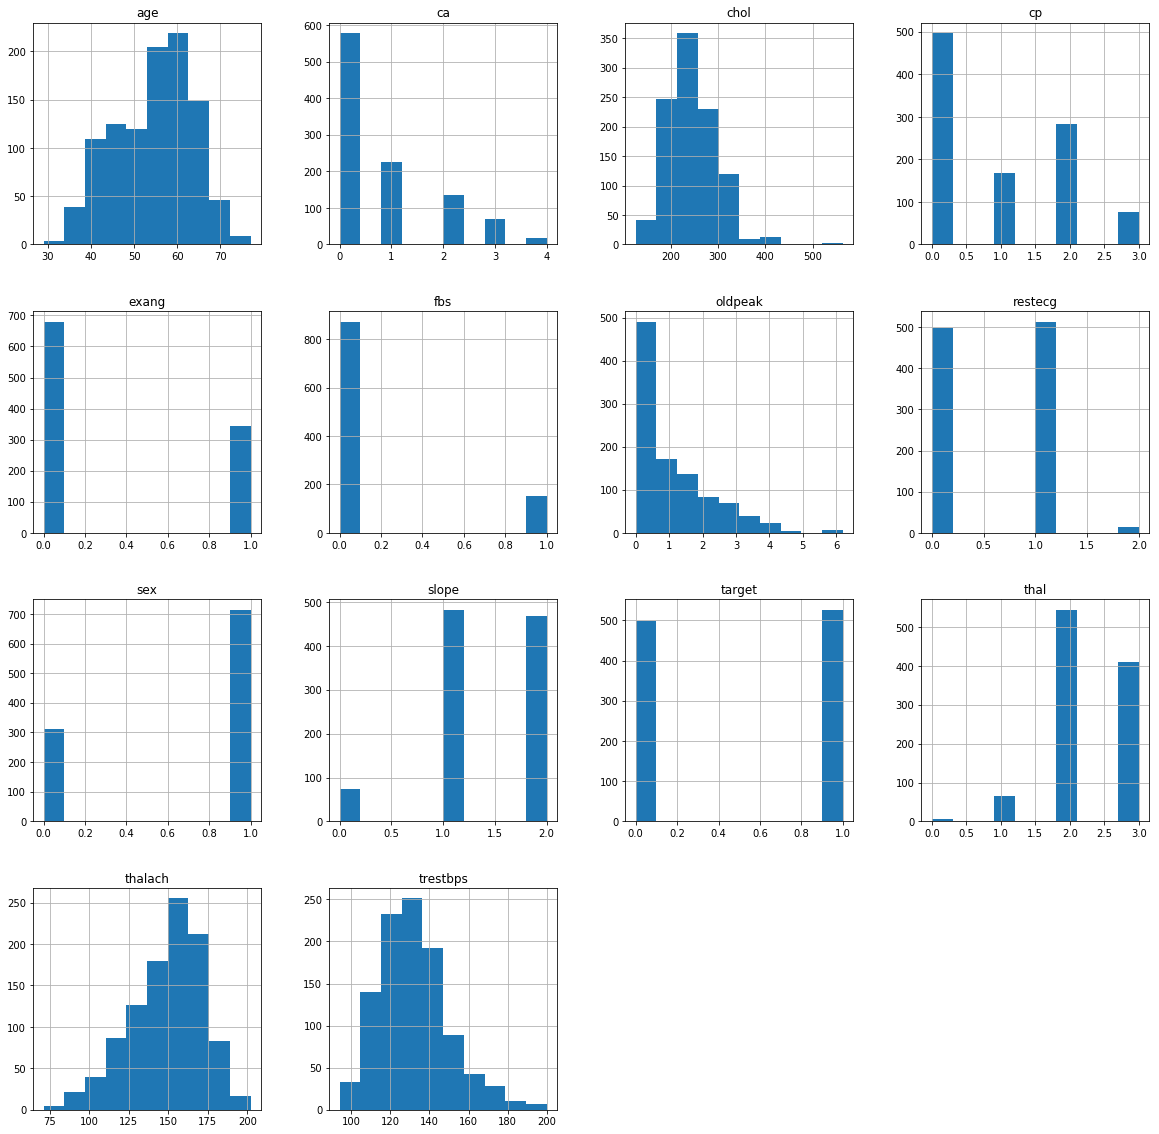

In [8]:
df.hist(figsize=(20,20))
plt.show()

As you can see above some of the features are numeric and the others are categorical. So I will create two categories for these two different features and study them seprately.

In [9]:
numeric_features = ['age','trestbps','thalach','oldpeak']
categorical_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

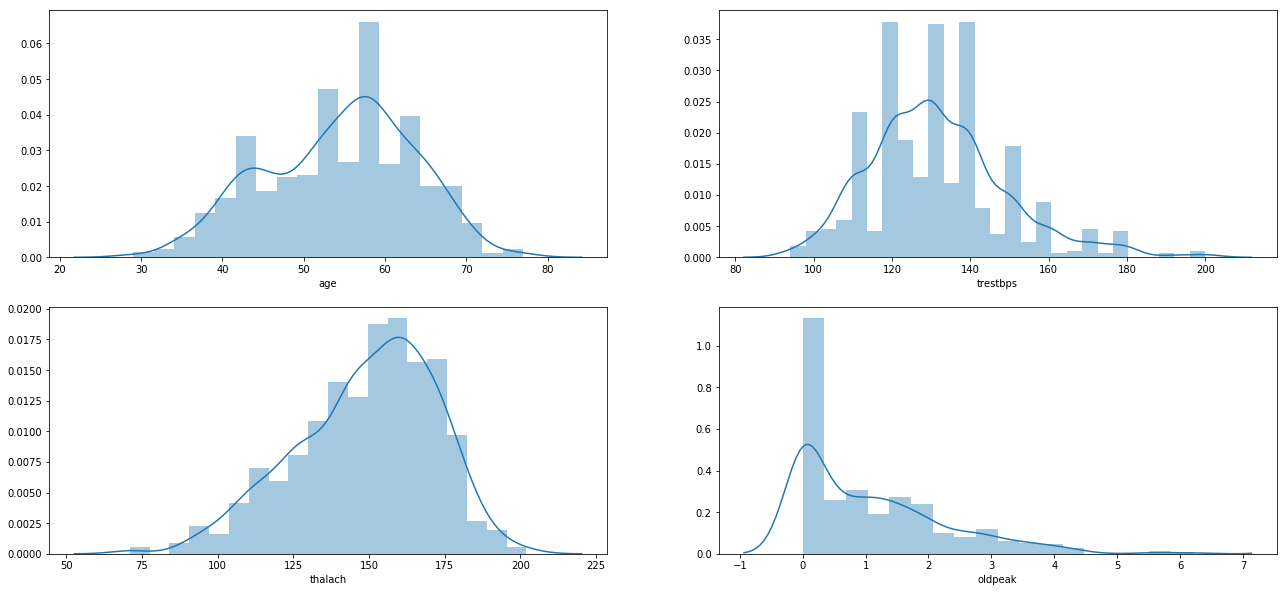

In [10]:
numerics = df[numeric_features]
fig, ax = plt.subplots(2,2,figsize=(22, 10))
for i, col in enumerate(numerics):
    plt.subplot(2,2,i+1)
    plt.xlabel(col, fontsize=10)
    sns.distplot(numerics[col].values)
plt.show() 

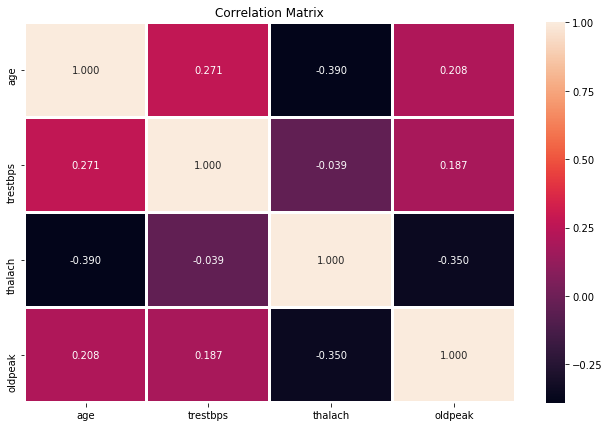

In [11]:
corr = numerics.corr()
sns.heatmap(corr,annot=True,fmt='.3f',linewidths=2)
plt.title('Correlation Matrix')
plt.gcf().set_size_inches(11,7)
plt.show()

### Plotting the frequency of categorical features

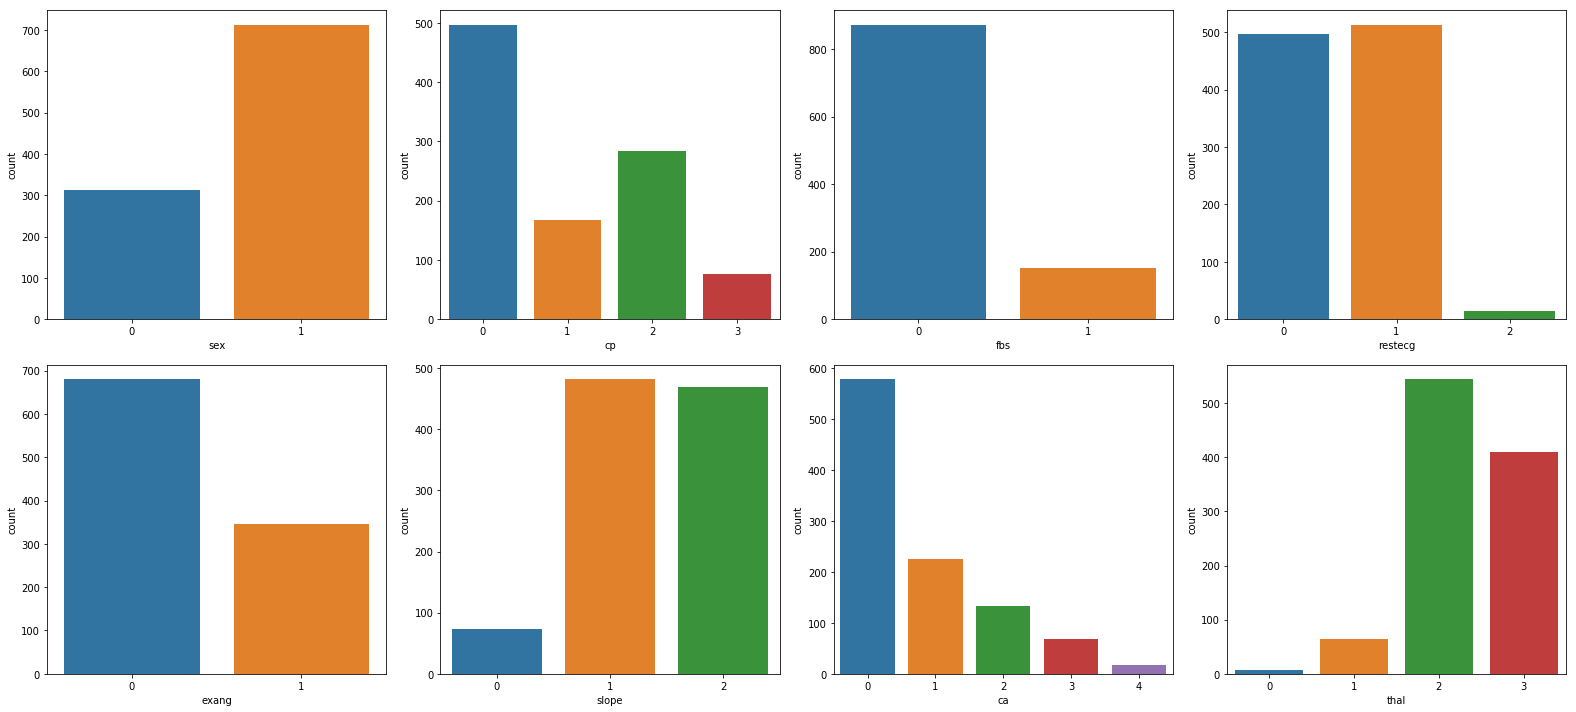

In [12]:
categorical = df[categorical_features]
fig, axes = plt.subplots(round(len(categorical.columns) / 4), 4, figsize=(22, 10))

for i, ax in enumerate(fig.axes):
    if i < len(categorical.columns):
        sns.countplot(x=categorical.columns[i], data=categorical, ax=ax)
    

fig.tight_layout()

### Bivariate analysis 

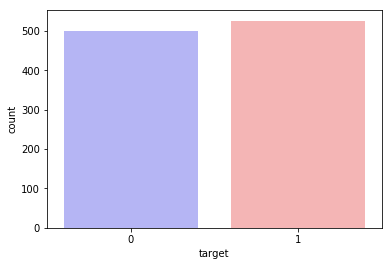

In [13]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

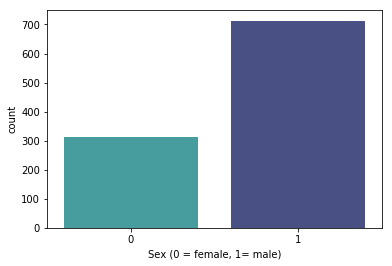

In [14]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In the above output, I wish it would be good if there was an equal proportion of people. At the moment it seems to be imbalance value, but for this situation it applies to Gender.

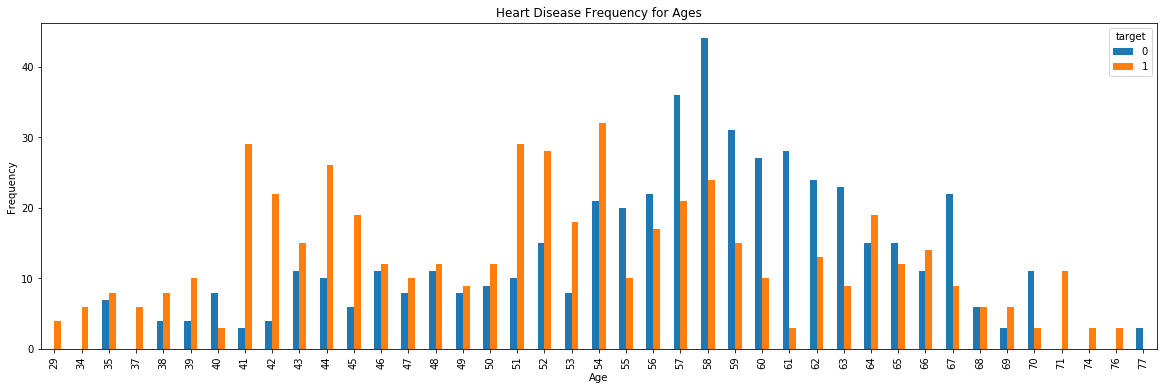

In [15]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

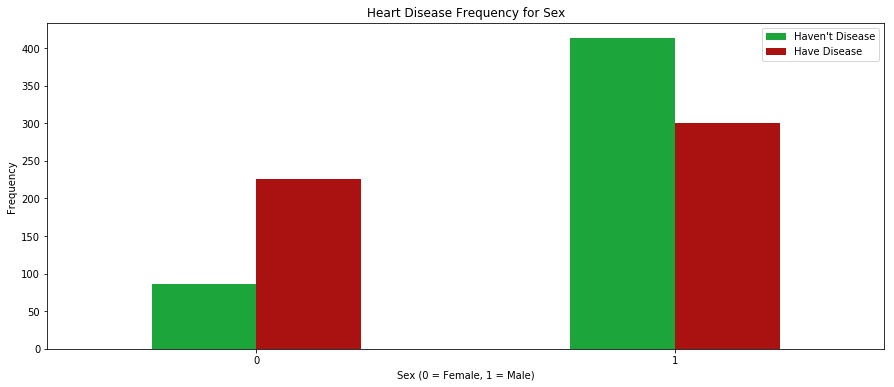

In [16]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Above graph shows that male has less heart disease in their population regarding females.

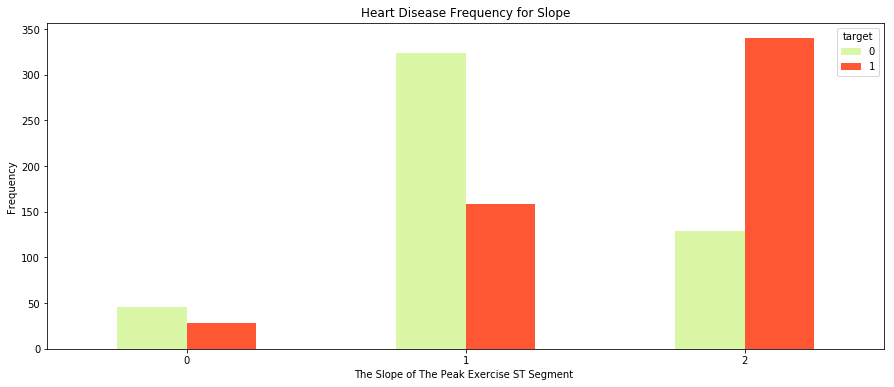

In [17]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

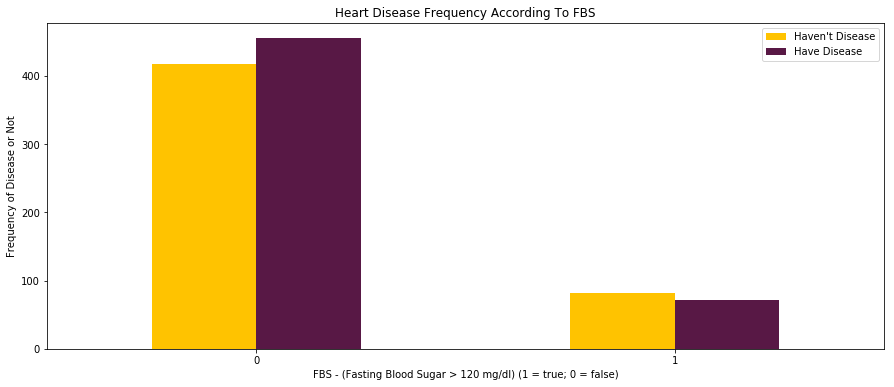

In [18]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

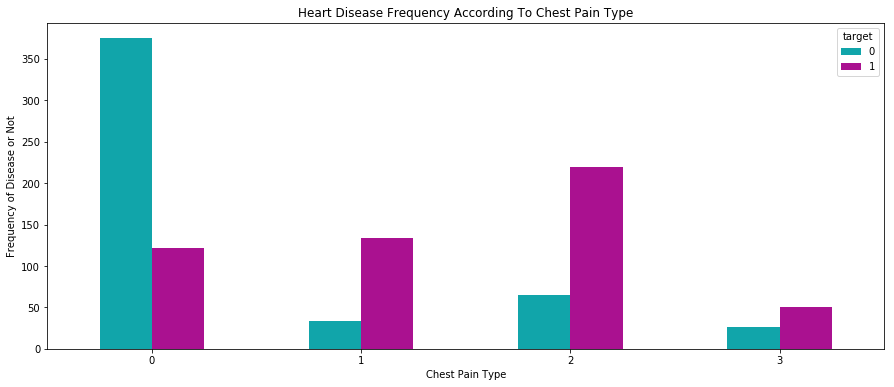

In [19]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

<Figure size 7200x7200 with 0 Axes>

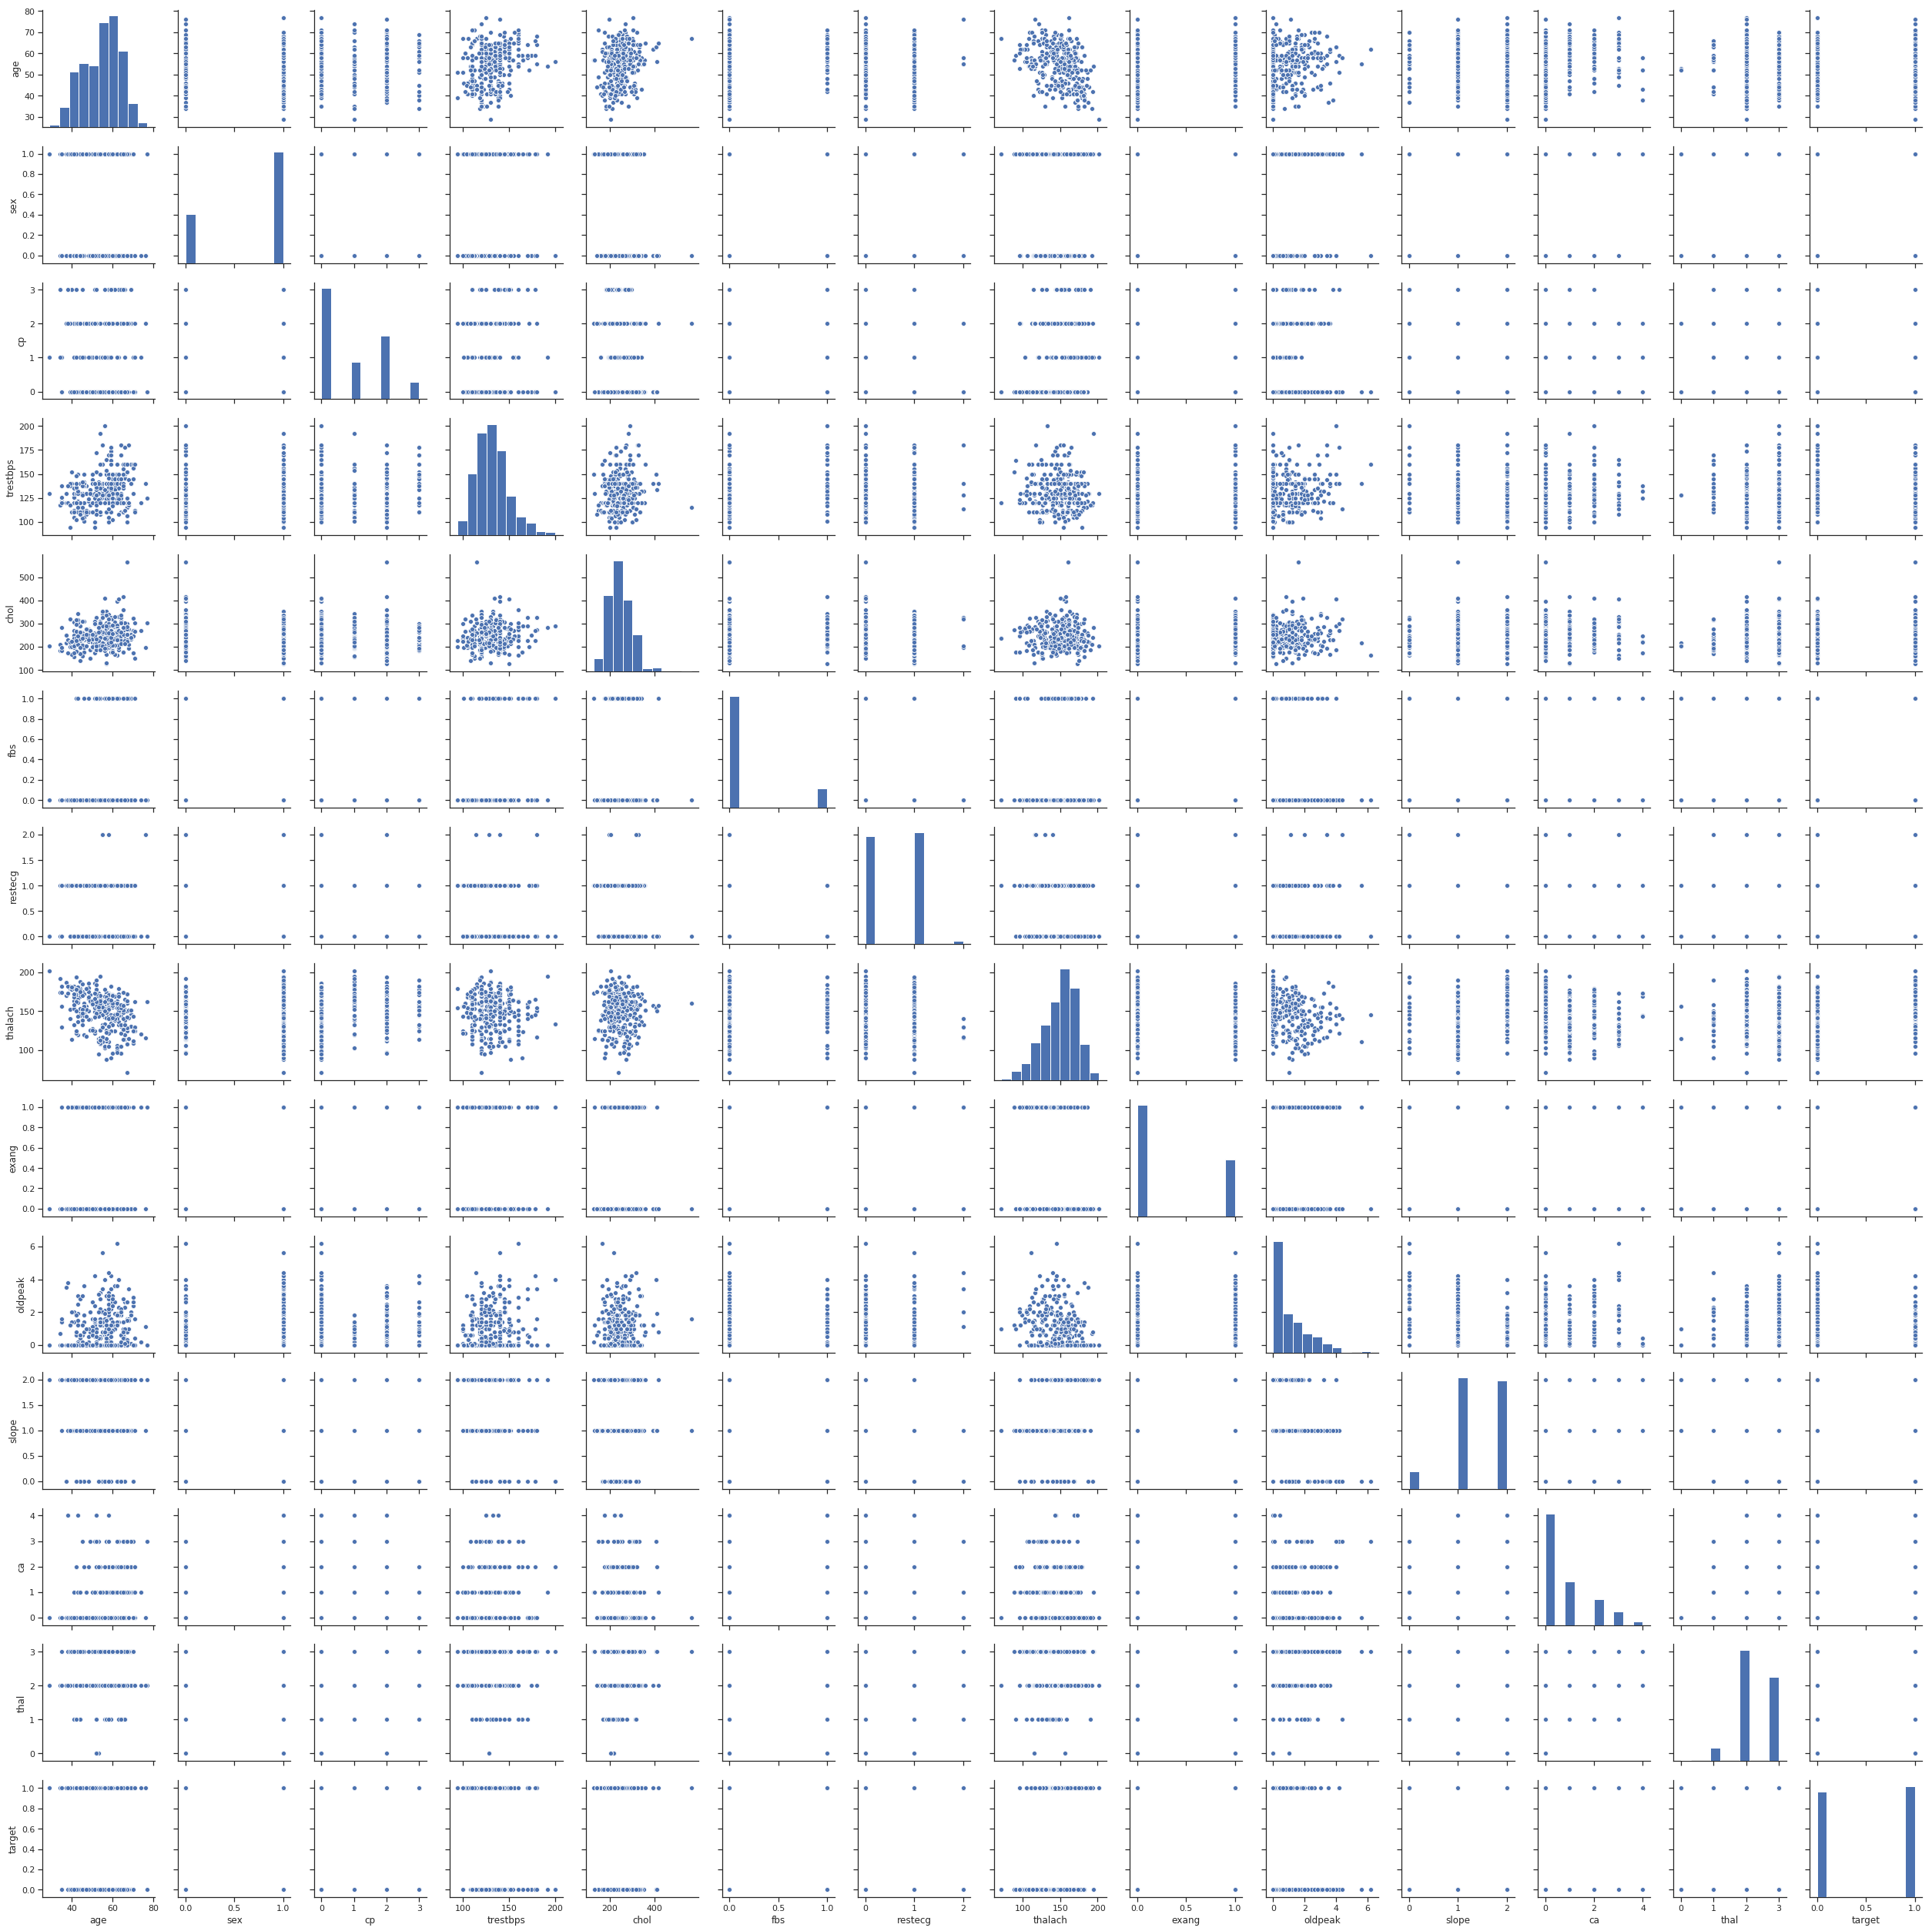

In [20]:
plt.figure(figsize=(100,100))
sns.set(style="ticks")
sns.pairplot(df)
plt.show()

The above visualiztion used to show the releation of features pairwise.

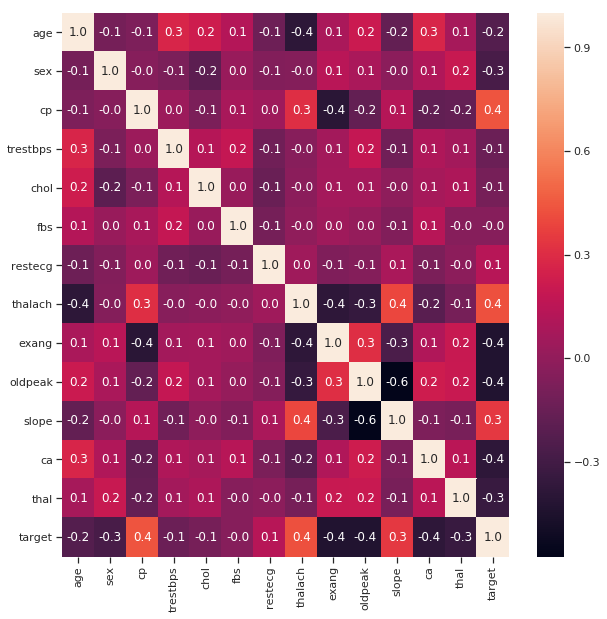

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

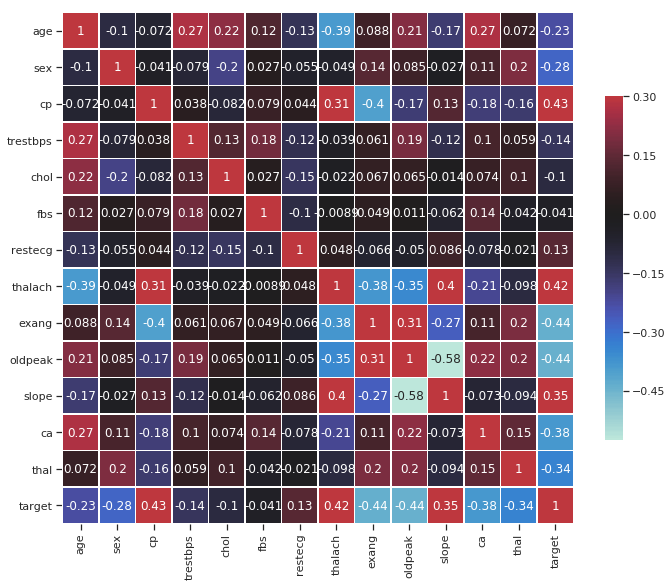

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()


From the seaborn heatmap shown above we can see none of the features are highly correlated.

## MODEL, TRAINING and TESTING

We can train our prediction model by analyzing existing data because we already know whether each patient has heart disease. This process is also known as supervision and learning. The trained model is then used to predict if users suffer from heart disease. The training and prediction process is described as follows:

First, data is divided into two parts using component splitting. In this experiment, data is split based on a ratio of 80:20 for the training set and the prediction set. The training set data is used in the logistic regression component for model training, while the prediction set data is used in the prediction component.

The following classification models are used - Logistic Regression, Random Forest Classfier, SVM, Naive Bayes Classifier, Decision Tree Classifier.

In [24]:
# defining x and y
y = df[['target']]
X = df.drop(['target'],axis = 1)


As we saw in the EDA part of the project the range of features are in different interval so we will standardize the data so we can get a better sense out of them.

In [25]:
# Standardizing data

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Splitting train and test 
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 42)

## Dicision Tree

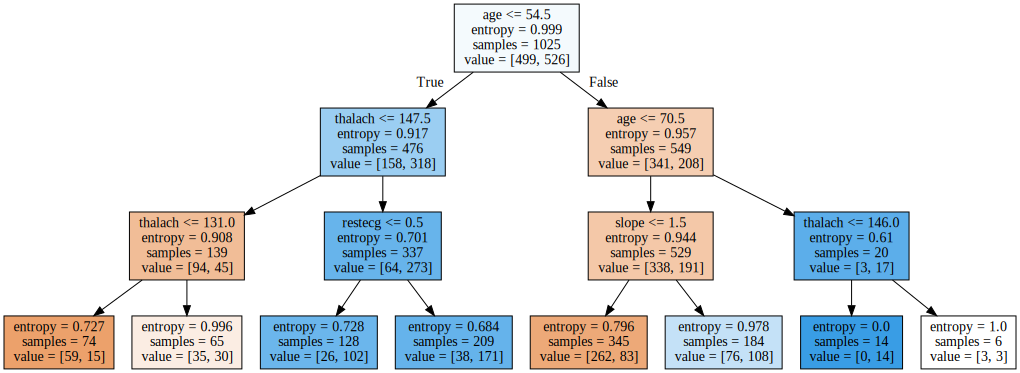

Decision Tree done! Time elapsed: 0.03920435905456543 seconds


In [26]:
import os
from IPython.display import SVG
from graphviz import Source
import itertools


time_start = time.time()


tree = DecisionTreeClassifier(max_depth=3,
                             criterion='entropy',
                            max_features=1,
                             random_state = 1337)
tree.fit(X , y)
graph = Source(export_graphviz(tree
                               , feature_names=X.columns
                               , filled = True))
display(SVG(graph.pipe(format='svg')))

print('Decision Tree done! Time elapsed: {} seconds'.format(time.time()-time_start))

The above tree first divide the patients by the chest pain. If the chest pain is high then study their cholestrol level. On the other hand if the chest pain is less then, its thalassemia(less than 3 is normal). Therefore we can see the left are the one without heart diseases  and on the right with heart disease.

In [27]:
# Define accuracy and time dictionary to compare the results at the end
accuracies = {}
times = {}

In [28]:
acc = tree.score(X, y)*100

accuracies['Decision Tree'] = acc
print("Test Accuracy {:.2f}%".format(acc))

time_start = time.time()
pred_tree = tree.predict(X)
print('Decision Tree done! Time elapsed: {} seconds'.format(time.time()-time_start))
times['Decision Tree'] = time.time() - time_start

Test Accuracy 73.56%
Decision Tree done! Time elapsed: 0.0014355182647705078 seconds


### Try logistic Regression

In [29]:
# Build logistic Regression model.
lr = LogisticRegression()
lr.fit(X_train,y_train)
acc = lr.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 79.51%


In [30]:
print(lr.coef_)

[[-0.00638436 -0.83908746  0.87709779 -0.31817917 -0.46424877 -0.06281443
   0.14035411  0.65509792 -0.41759816 -0.78639271  0.34927304 -0.84302285
  -0.67408942]]


Text(0.5, 0, 'Relative Feature Importance')

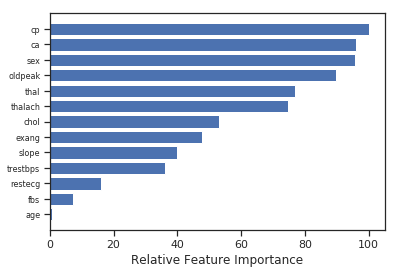

In [31]:
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')


In [32]:
# Cross Validation

cross_val_score(lr, X_train, y_train, cv=5)

array([0.83636364, 0.84848485, 0.8902439 , 0.86503067, 0.79754601])

In [33]:
# Cross Validation

cross_val_score(lr, X_test, y_test, cv=5)

array([0.78571429, 0.73809524, 0.85365854, 0.775     , 0.85      ])

In [34]:
time_start = time.time()
pred_lr= lr.predict(X)
print('Linear regression done! Time elapsed: {} seconds'.format(time.time()-time_start))
times['Linear Regression'] = time.time() - time_start

Linear regression done! Time elapsed: 0.0020859241485595703 seconds


### K-Nearest Neighbour (KNN) Classification

In [35]:
# Build KNN model
for i in range(2,6):
    
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)

    print("{} NN Score: {:.2f}%".format(i, knn.score(X_test, y_test)*100))

2 NN Score: 97.56%
3 NN Score: 93.66%
4 NN Score: 88.78%
5 NN Score: 83.41%


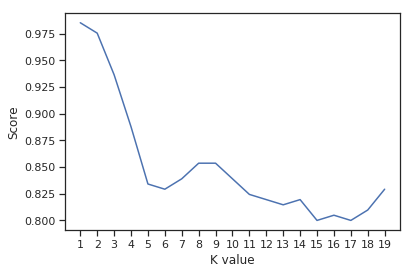

Maximum KNN Score is 98.54%


In [36]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

As you can see above if we define k as 2 we will reach maximum score

In [37]:
# Cross Validation

cross_val_score(knn, X_train, y_train, cv=5)

array([0.89090909, 0.84848485, 0.86585366, 0.83435583, 0.77300613])

In [38]:
# Cross Validation

cross_val_score(knn, X_test, y_test, cv=5)

array([0.76190476, 0.69047619, 0.7804878 , 0.75      , 0.725     ])

In [39]:
time_start = time.time()
pred_KNN = knn.predict(X)
print('KNN done! Time elapsed: {} seconds'.format(time.time()-time_start))
times['KNN'] = time.time() - time_start

KNN done! Time elapsed: 0.04042458534240723 seconds


### Support Vector Machine (SVM) Algorithm

In [40]:
# Build SVM model.
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

acc = svm.score(X_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 88.78%


In [41]:
# Cross Validation

cross_val_score(svm, X_train, y_train, cv=5)

array([0.95151515, 0.8969697 , 0.90853659, 0.94478528, 0.88343558])

In [42]:
# Cross Validation

cross_val_score(svm, X_test, y_test, cv=5)

array([0.76190476, 0.73809524, 0.82926829, 0.8       , 0.8       ])

### Naive Bayes Algorithm

In [43]:
# Build Naive Bayes model.
nb = GaussianNB()
nb.fit(X_train, y_train)

acc = nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 80.00%


In [44]:
# Cross Validation

cross_val_score(nb, X_train, y_train, cv=5)

array([0.83636364, 0.8       , 0.85365854, 0.88343558, 0.79141104])

In [45]:
# Cross Validation

cross_val_score(nb, X_test, y_test, cv=5)

array([0.83333333, 0.69047619, 0.70731707, 0.825     , 0.75      ])

### Random Forest Classification

In [46]:
# Build Random Forest model.
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

acc = rf.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 98.54%


In [47]:
# Cross Validation

cross_val_score(rf, X_train, y_train, cv=5)

array([0.99393939, 0.94545455, 1.        , 0.98773006, 0.95705521])

In [48]:
# Cross Validation

cross_val_score(rf, X_test, y_test, cv=5)

array([0.83333333, 0.83333333, 0.90243902, 0.8       , 0.925     ])

In [49]:
time_start = time.time()
pred_random_forest_test = rf.predict(X)
print('Random forest done! Time elapsed: {} seconds'.format(time.time()-time_start))
times['Random Forest'] = time.time() - time_start

Random forest done! Time elapsed: 0.14349031448364258 seconds


### Keras

In [50]:
#Starting Neural network
model = Sequential()

#ADD a input layer and the first hidden layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'relu', input_dim = 13))

#Add the second hidden layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'relu'))

#Add the third hidden layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'relu'))

#ADD the output layer
model.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'sigmoid'))

#Compile the first Neural Network
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fit a train test in a NeuralNetwork
history = model.fit(X_train, y_train, validation_data= (X_test,y_test),batch_size = 32, epochs = 200)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 820 samples, validate on 205 samples
Epoch 1/200
820/820 [==============================] - 0s 411us/step - loss: 0.6931 - acc: 0.5110 - val_loss: 0.6928 - val_acc: 0.5024
Epoch 2/200
820/820 [==============================] - 0s 40us/step - loss: 0.6914 - acc: 0.5159 - val_loss: 0.6886 - val_acc: 0.5561
Epoch 3/200
820/820 [==============================] - 0s 41us/step - loss: 0.6791 - acc: 0.7415 - val_loss: 0.6670 - val_acc: 0.7659
Epoch 4/200
820/820 [==============================] - 0s 40us/step - loss: 0.6332 - acc: 0.8110 - val_loss: 0.6053 - val_acc: 0.7756
Epoch 5/200
820/820 [==============================] - 0s 39us/step - loss: 0.5350 - acc: 0.8439 - val_loss: 0.5174 - val_acc: 0.7902
Epoch 6/200
820/820 [==============================] - 0s 39us/step - loss: 0.4268 - acc: 0.8610 - val_loss: 0.4570 - val_acc: 0.8146
Epoch 7/200
820/820 [========

In [51]:
acc = model.evaluate(X_test, y_test, verbose=0)[1]*100

accuracies['Keras'] = acc
print("Test Accuracy {:.2f}%".format(acc))

time_start = time.time()
pred_keras = model.predict(X)
print('Decision Tree done! Time elapsed: {} seconds'.format(time.time()-time_start))
times['Keras'] = time.time() - time_start

Test Accuracy 96.59%
Decision Tree done! Time elapsed: 0.03587222099304199 seconds


### Comparing Models

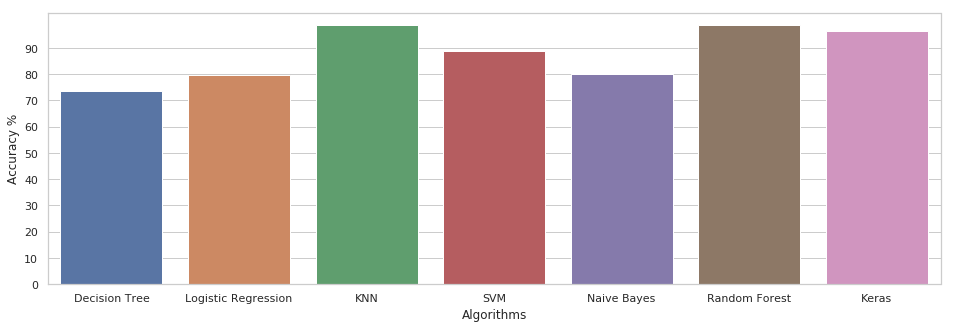

In [52]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()

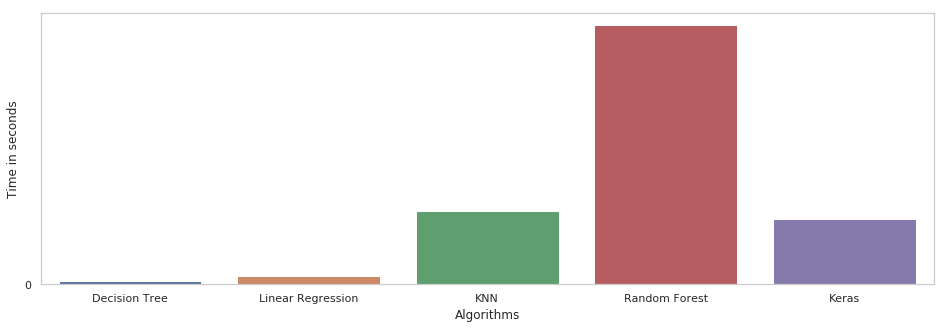

In [53]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Time in seconds")
plt.xlabel("Algorithms")
sns.barplot(x=list(times.keys()), y=list(times.values()))
plt.show()

In [54]:
# Predicted values
y_head_lr = lr.predict(X_test)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)
y_head_knn = knn3.predict(X_test)
y_head_svm = svm.predict(X_test)
y_head_nb = nb.predict(X_test)
y_head_rf = rf.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_rf = confusion_matrix(y_test,y_head_rf)

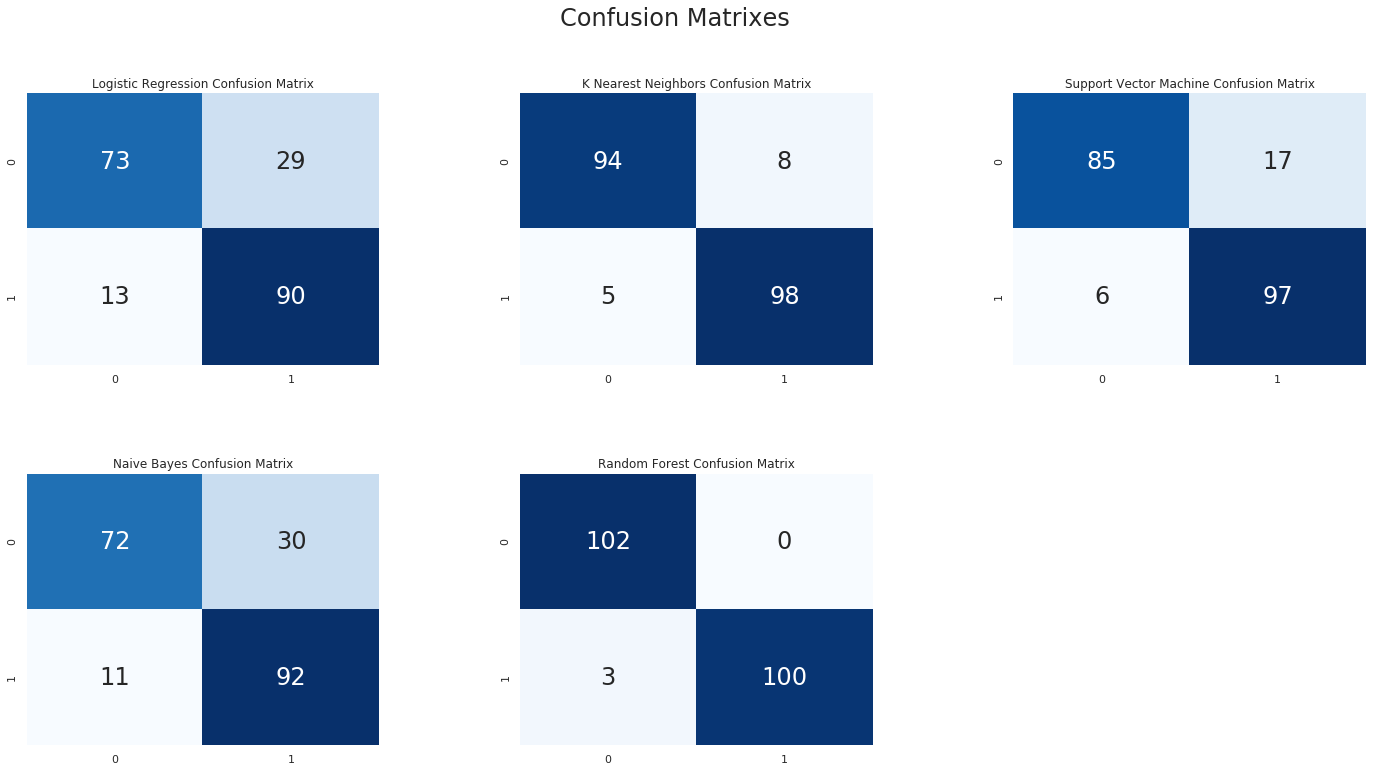

In [56]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Text(0.5, 0, 'Relative Feature Importance')

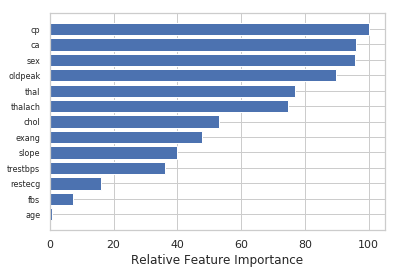

In [57]:
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')


For example by looking at the aboce factors and trying to resuce them, we might be able to decrease the chance of heart disease.

## conclusion

By Comparing various models from algorithm graph we can choose KNN, Random Forest and Keras as thetop three in performance and accuracy. Then we can take a loot at the time of prediciting to see how much does it take for machine to predict. At the end, this is the whole goal of Machine learning and time and cost will definetly play a great role to chose the most efficient model. It's obvious that "Keras" not only hast a great performance, but also is the best efficient model.